### Using Compositional Pattern Producing Networks for Album Artworks
### (Neural Network: XY -> Grayscale)


Anti-Disconnect for Google Colab:

In [ ]:
# https://colab.research.google.com/github/justinjohn0306/VQGAN-CLIP/blob/main/VQGAN%2BCLIP(Updated).ipynb#scrollTo=g7EDme5RYCrt

import IPython
js_code = '''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

Importing Required Libraries:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image

Using the Pillow Package to experiment with an image generated by the [VQGAN+CLIP Model](https://colab.research.google.com/github/justinjohn0306/VQGAN-CLIP/blob/main/VQGAN%2BCLIP(Updated).ipynb#scrollTo=g7EDme5RYCrt) --> prompt used for image generation: "london mondrian style | unreal engine"

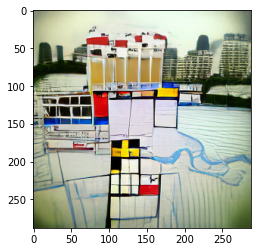

In [ ]:
#https://pillow.readthedocs.io/en/stable/reference/Image.html
img = np.array(Image.open('/content/londonmondrian.png'))
smaller_img = resize(img, (128, 128, 3))
plt.imshow(img)

In [ ]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [ ]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs 
y = tf.reshape(smaller_img, [-1,1,3])  # Outpus

Building the 1st model: Relu + Sigmoid Activation Function, Stochastic Gradient Descent Optimizer (8 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
model.fit(X, y, epochs=8, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

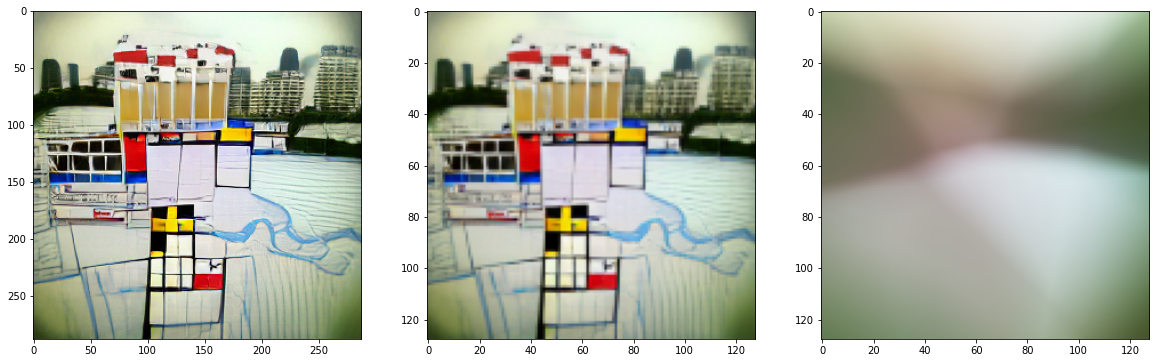

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

Building the 2nd model: Relu + Sigmoid Activation Function, Adam Optimizer (8 epochs)



In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=8, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

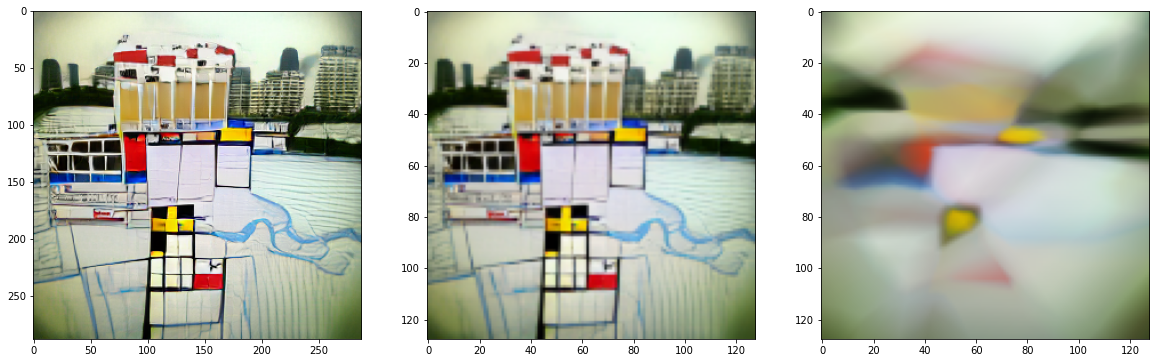

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

Since the output using the Adam Optimiser looked much more defined, most of the following models shall be using that Optimiser instead of SGD. The following two models are the same as above, just trained on 50 and 100 epochs.

Building the 3rd model: Relu + Sigmoid Activation Function, Adam Optimizer (50 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=50, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

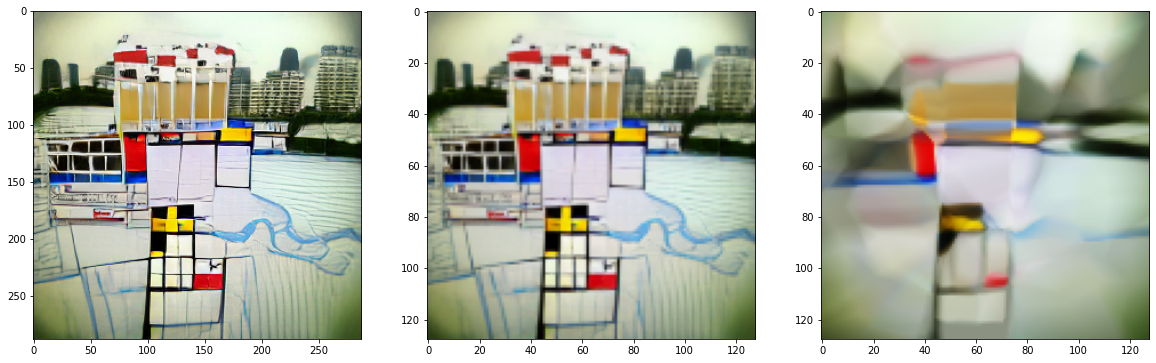

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

Building the 4th model: Relu + Sigmoid Activation Function, Adam Optimizer (100 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=100, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

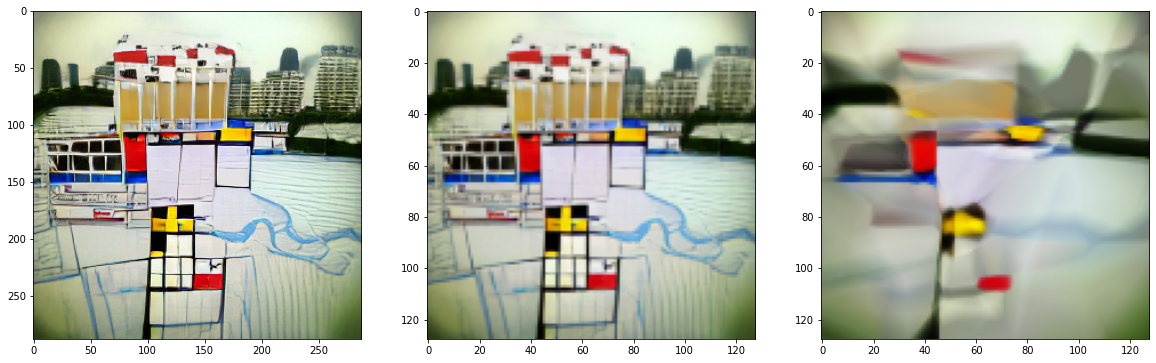

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

# *Trying to replicate the results from [CPPN Playground](https://silky.github.io/cppn-playground/) by mixing up various Activation Functions. The output from the CPPN Playground on 100 epochs looked like this:*

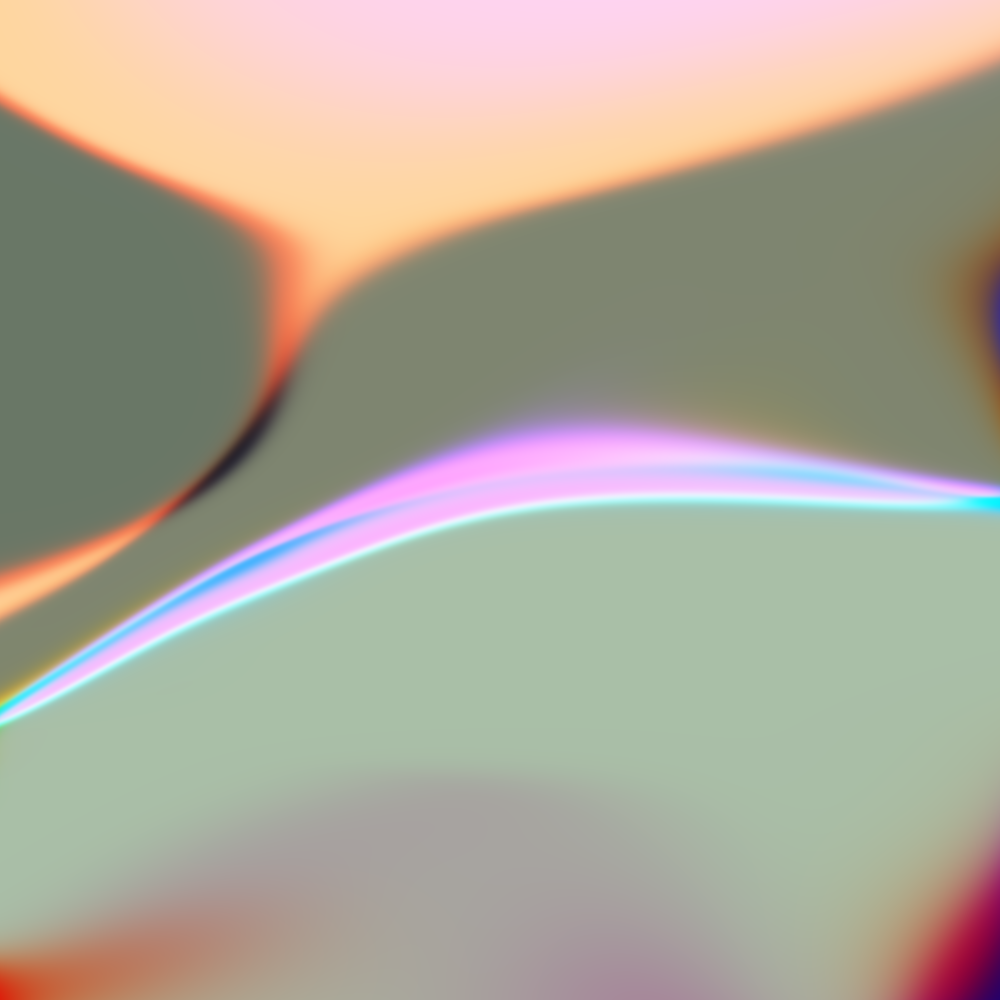

Building the 5th model: Tanh + Elu + Softplus Activation Function, Adam Optimizer (100 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='elu'),
    Dense(32, activation='elu'),
    Dense(32, activation='tanh'),
    Dense(3, activation='softplus')
])
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=100, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

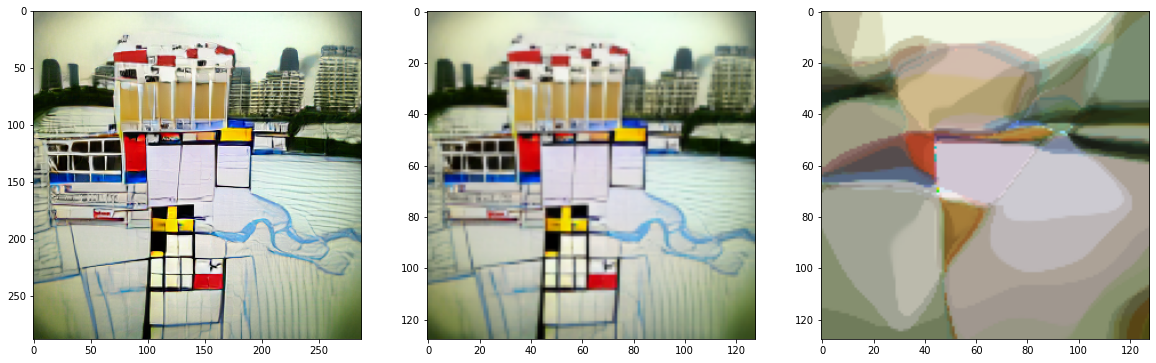

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

Since the output with the Adam Optimiser looked very sharp, the following model explores the same using SGD Optimiser and the output looks much more pleasant.

Building the 6th model: Tanh + Elu + Softplus Activation Function, SGD Optimizer (100 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='elu'),
    Dense(32, activation='elu'),
    Dense(32, activation='tanh'),
    Dense(3, activation='softplus')
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
model.fit(X, y, epochs=100, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

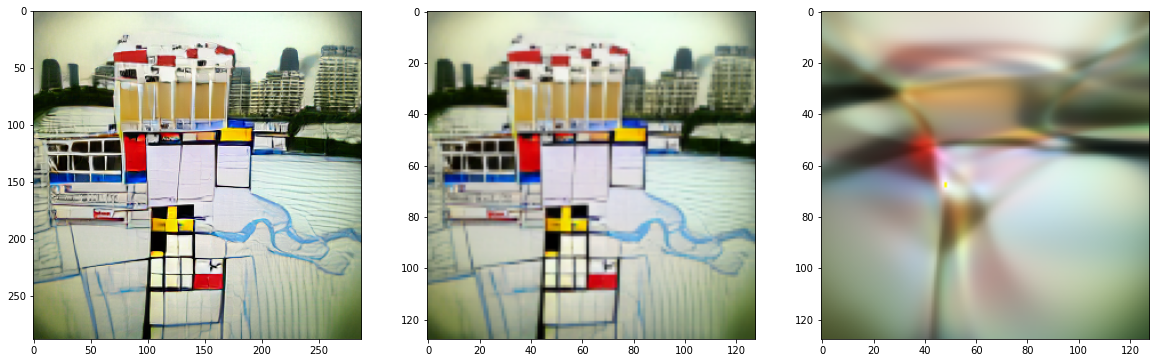

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

Trying out other combinations of Activation Functions, but this time running it on only a few epochs to see if the output looks similar to the second model.

Building the 7th model: Selu + Tanh + Relu + Sigmoid Activation Functions, Adam Optimizer (8 epochs)

In [ ]:
model = Sequential([
    Dense(16, input_dim=2, activation='selu'),
    Dense(32, activation='selu'),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=8, batch_size=1)

In [ ]:
# Traning data is stored in 'X', so passing that into the trained model and seeing what it produces.
prediction = model.predict(X)

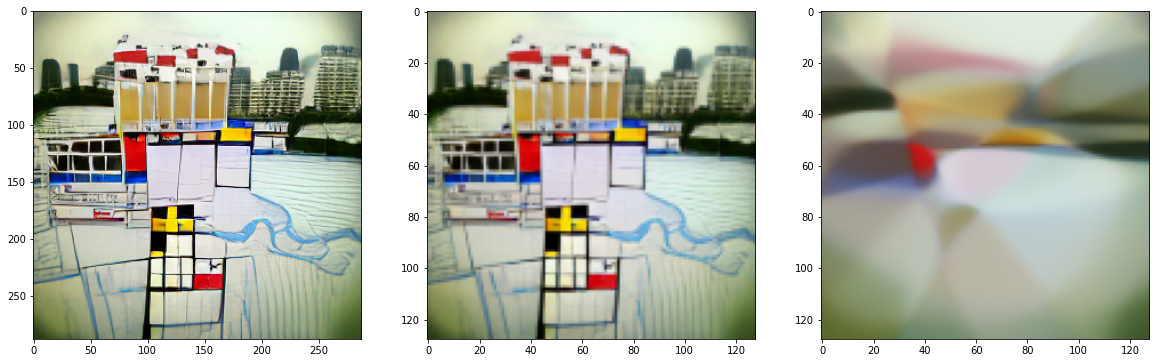

In [ ]:
# Reshaping it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (128, 128,3))
# Scaling the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Converting the tensor into a numpy array, and casting the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Looking at the creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

All the seven models have 6 layers for consistency. The second last model (Tanh + Elu + Softplus Activation Function, SGD Optimiser) had the most aesthetically pleasing output compared to the rest when trained on 100 epochs. The same had a really sharp and unpleasant output when the Adam Optimiser was used. However, the Adam Optimiser seemed to be the better choice for the first few models where Relu and Sigmoid activation functions were utilised with just 8 epochs, as the outputs using SGD were too soft. Therefore, different models can be used depending on the kind of aesthetic one is aiming for whne it comes to album art covers. The generated image created from these models are still quite different from the input image as all the details weren't captured in the outputs - even the colour placement for each are a bit non-identical, which leads to quite interesting results. 
